In [17]:
import requests
from datetime import datetime
from urllib.parse import urlencode
import pandas as pd
import numpy as np
import plotly.graph_objects as go

In [18]:
BASE_URL = "https://data.mitwelten.org/api/v3/"
LEVEL = "SPECIES"


In [25]:
# request a list with all species
taxon_list = requests.get(f"{BASE_URL}taxonomy/level/{LEVEL}").json()
taxon_list[:2]

[{'datum_id': 2480589,
  'label_sci': 'Accipiter gentilis',
  'label_de': 'Habicht',
  'label_en': 'Goshawk',
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/8/81/Northern_Goshawk_ad_M2.jpg',
  'rank': 'SPECIES'},
 {'datum_id': 2480637,
  'label_sci': 'Accipiter nisus',
  'label_de': 'Sperber',
  'label_en': 'Eurasian Sparrowhawk',
  'image_url': 'https://upload.wikimedia.org/wikipedia/commons/2/24/Sparrowhawk_at_the_bottom_of_the_garden_1_%285339463544%29.jpg',
  'rank': 'SPECIES'}]

In [26]:
# find the taxon_key by name
SPECIES_NAME = "Apus apus"
taxonomy_tree = requests.get(f"{BASE_URL}taxonomy/sci/{SPECIES_NAME}").json()
species_id = taxonomy_tree[0].get("datum_id")
species_id

5228676

In [27]:
CONFIDENCE = 0.8
BUCKET_WIDTH = "1d"
TIME_FROM = datetime(2021, 5, 1).isoformat()
TIME_TO = datetime(2021, 9, 1).isoformat()
params = {
    "conf": CONFIDENCE,
    "bucket_width": BUCKET_WIDTH,
    "from": TIME_FROM,
    "to": TIME_TO,
}
url = f"{BASE_URL}birds/{species_id}/date?{urlencode(params)}"
response = requests.get(url).json()
response.keys()

dict_keys(['bucket', 'detections'])

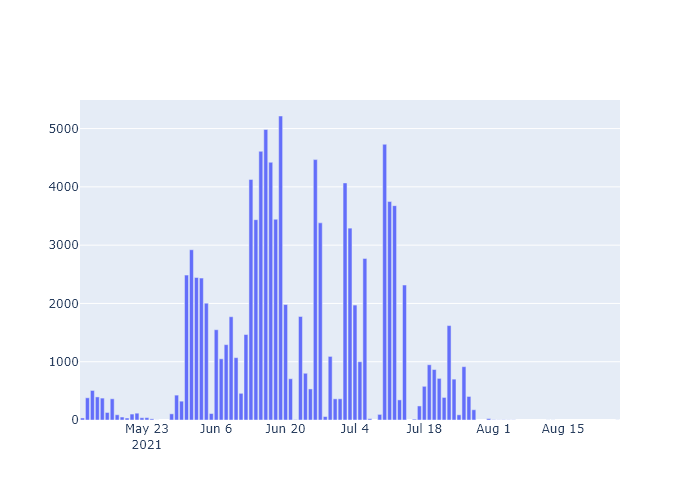

In [28]:
fig = go.Figure(go.Bar(x=response.get("bucket"),y=response.get("detections")))
fig.show("png")

In [29]:
# Time of day
url = f"{BASE_URL}birds/{species_id}/time_of_day?{urlencode(params)}"
response = requests.get(url).json()
response.keys()

dict_keys(['minuteOfDay', 'detections'])

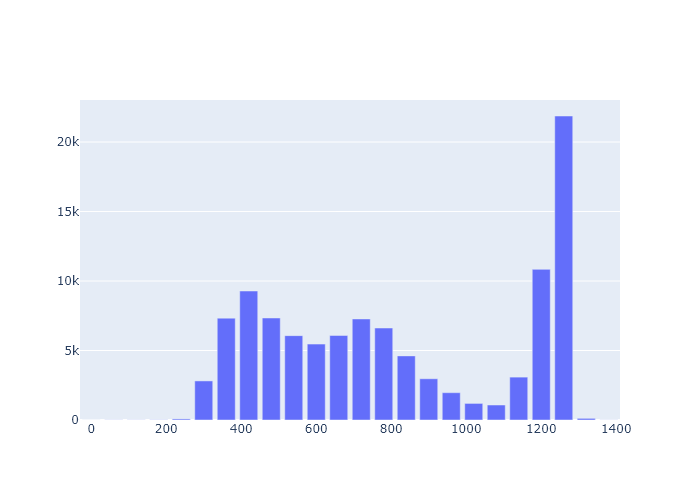

In [30]:
fig = go.Figure(go.Bar(x=response.get("minuteOfDay"),y=response.get("detections")))
fig.show("png")

In [33]:
# locations
url = f"{BASE_URL}birds/{species_id}/location?{urlencode(params)}"
response = requests.get(url).json()
response[:2]

[{'location': {'lat': 47.534230119, 'lon': 7.614490083},
  'detections': 9158,
  'deployment_id': 3},
 {'location': {'lat': 47.535135, 'lon': 7.614674},
  'detections': 10836,
  'deployment_id': 4}]